Para hacer un algoritmo genético tenemos que definir:
- Una representación del genotipo de un individuo
  - Teniendo en mente que esto es lo que se va a heredar, mutar y cruzar entre individuos
- Fenotipo
  - La representación visual que se ve en un individuo
- Función de fitness
  - Es lo que nos dice qué tan cercano al resultado final es un individuo
- Forma de realizar el cruce
  - Cómo se van a combinar los cromosomas de los padres?
  - Tipos: cruce de un punto, cruce de dos puntos, cruce uniforme...
- Forma de realizar la mutación
  - Qué tanto vamos a mutar los genes de un individuo
- Estrategia de reemplazo
  - Cómo se reemplazan los individuos de cada generación?
  - Tipos: generacional, elitista.

# Fenotipo y genotipo
Nuestro **fenotipo** va a ser la imagen generada que nosotros como humanos podemos ver, si ese es nuestro fenotipo, entonces el genotipo tienen que ser primitivas a partir de las cuales se saque/calcule/genere el fenotipo.

Basado en diferentes ejemplos de repositorios y aplicaciones que realizan
proyectos similares, parece que lo mejor es elegir como genotipo una especificación
de figuras geométricas.

De manera que vamos a tener los siguientes genes:
1. Cantidad de cuadrados
2. Lista de cuadrados
   - Posiciones de sus vértices
   - Color 

In [108]:
from PIL import Image, ImageDraw, ImageChops, ImageColor

canvas_size = (50, 50)
def make_fenotype(genotype):
    canvas = Image.new("RGB", canvas_size, ImageColor.getrgb("white"))
    draw = ImageDraw.Draw(canvas, "RGBA")
    for figure in genotype.figures:
        draw.rectangle(
            [figure.initial_point, figure.end_point], fill=figure.color)
    canvas.save("fenotype.png")
    return canvas

In [109]:
class MyRect:
    def __init__(self, initial_point:tuple[int, int], 
                 end_point:tuple[int, int], color:tuple[int, int, int])-> None:
        self.initial_point = initial_point
        self.end_point = end_point
        self.color = color

class Genotype:
    def __init__(self, figure_quantity: int, figures: list[MyRect]) -> None:
        self.figure_quantity = figure_quantity
        self.figures = figures

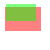

In [110]:
# Ejemplo de un genotipo y su correspondiente genotipo
genotype = Genotype(2, [
    MyRect((5, 7), (40, 30), (255, 0, 0, 127)),
    MyRect((6, 4), (35, 20), (0, 255, 0, 127))
])

display(make_fenotype(genotype))

# Fitness
Necesitamos una función que sea capaz de comparar dos imágenes.

Existen varias alternativas para esto:
- MSE (Mean Squared Error): Esta métrica compara los píxeles individuales de las dos imágenes y calcula el promedio de las diferencias cuadráticas entre los valores de píxeles correspondientes. Cuanto menor sea el valor de MSE, más similares serán las imágenes.
- PSNR (Peak Signal-to-Noise Ratio): Es una métrica que mide la calidad de una imagen comparando la señal (la imagen objetivo) con el ruido (la diferencia entre la imagen objetivo y la generada). Cuanto mayor sea el valor de PSNR, más se parecerán las imágenes.
- SSIM (Structural Similarity Index): Esta métrica evalúa la similitud estructural entre dos imágenes, teniendo en cuenta la luminancia, el contraste y la estructura. SSIM proporciona un valor entre -1 y 1, donde 1 indica una similitud perfecta.
- Cosine Similarity: Esta métrica mide la similitud coseno entre los vectores de píxeles de las dos imágenes. Puede ser útil si deseas comparar la similitud entre imágenes en espacios de características.

Inicialmente intentaremos con SSIM por ser más parecido a cómo los humanos comparamos
imágenes.
